**1)Necessary libraries,loading dataset,replacing null values and info of the data**


In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

In [16]:
census_data=pd.read_csv('C:\\Users\\Ramkrishna\\Downloads\\adult.csv')

In [17]:
census_data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [18]:
census_data=census_data.replace('?',np.nan)

In [19]:
census_data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [20]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


**2) Average age of males and females**

In [21]:
census_data.groupby('sex')['age'].agg('mean')

sex
Female    36.858230
Male      39.433547
Name: age, dtype: float64

**3) Qualifications of most of the individuals and plotting Bar Graph**

In [22]:
census_data.groupby('education')['education'].count().sort_values(ascending=False)

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

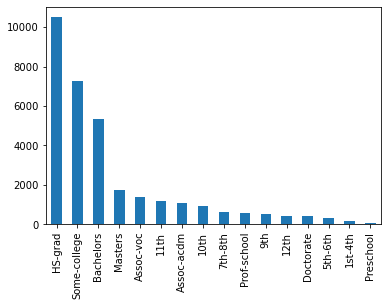

In [76]:
census_data.education.value_counts().plot(kind='bar',rot=90)
plt.show()

**4) Middle most observation of age for different work classes**

In [86]:
census_data.groupby('workclass')['age'].median()

workclass
Federal-gov         43.0
Local-gov           41.0
Never-worked        18.0
Private             35.0
Self-emp-inc        45.0
Self-emp-not-inc    44.0
State-gov           39.0
Without-pay         57.0
Name: age, dtype: float64

**5) Percentage of The Asian-Pac-Islander race people in the data**

In [25]:
census_data.groupby('race')['race'].count()*100/census_data['race'].count()

race
Amer-Indian-Eskimo     0.955130
Asian-Pac-Islander     3.190934
Black                  9.594300
Other                  0.832284
White                 85.427352
Name: race, dtype: float64

In [79]:
census_data['race'].value_counts()['Asian-Pac-Islander']*100/census_data['race'].count()

3.190933939375326

**6)Which occupation has more variability in the working hours**

In [27]:
census_data.groupby('occupation')['hours.per.week'].agg(['mean','std','var']).sort_values('var',ascending=False)

,mean,std,var
occupation,,,
Farming-fishing,46.989940,17.320156,299.987814
Priv-house-serv,32.885906,16.184548,261.939597
Armed-Forces,40.666667,14.071247,198.000000
Sales,40.781096,13.236410,175.202547
Transport-moving,44.656230,12.721380,161.833503
Other-service,34.701669,12.706004,161.442544
Prof-specialty,42.386715,12.536315,157.159186
Protective-serv,42.870570,12.331777,152.072728
Exec-managerial,44.987703,11.109113,123.412395


**7)Range of the middle 50% of working hours per week**

In [29]:
census_data['hours.per.week'].describe() 

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours.per.week, dtype: float64

**8) Negatively skewed features and plots**


In [30]:
census_data.skew()

C:\Users\Ramkrishna\AppData\Local\Temp\ipykernel_9104\3097489342.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  census_data.skew()


age                0.558743
fnlwgt             1.446980
education.num     -0.311676
capital.gain      11.953848
capital.loss       4.594629
hours.per.week     0.227643
dtype: float64

C:\Users\Ramkrishna\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='education.num', ylabel='Density'>

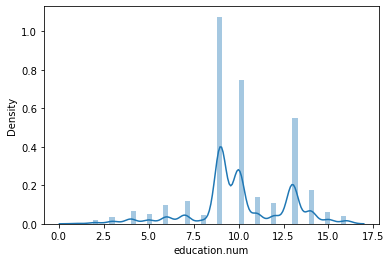

In [31]:
sns.distplot(census_data['education.num'])

**9)  Identifying the Presence of extreme values in age using visualization techniques**

<AxesSubplot:>

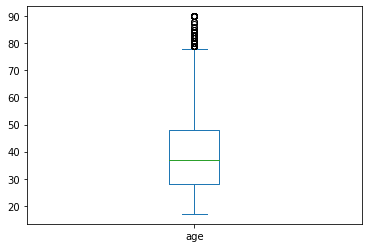

In [32]:
census_data['age'].plot(kind='box')

In [54]:
from matplotlib.cbook import boxplot_stats  
boxplot_stats(census_data.age).pop(0)['fliers']

array([90, 82, 83, 81, 90, 80, 81, 90, 79, 90, 83, 79, 79, 80, 90, 90, 90,
       90, 79, 90, 81, 90, 81, 79, 80, 90, 90, 79, 80, 81, 90, 88, 90, 90,
       80, 90, 82, 79, 81, 83, 90, 79, 81, 90, 90, 80, 90, 79, 84, 80, 90,
       81, 83, 84, 81, 79, 85, 82, 79, 84, 80, 90, 79, 84, 90, 79, 90, 90,
       82, 81, 90, 84, 79, 81, 82, 80, 90, 80, 84, 79, 90, 84, 90, 83, 79,
       81, 80, 80, 79, 80, 90, 90, 80, 90, 81, 83, 82, 90, 90, 80, 80, 90,
       80, 82, 85, 80, 79, 90, 81, 80, 79, 82, 88, 90, 82, 88, 84, 79, 86,
       90, 82, 81, 90, 80, 81, 79, 84, 84, 79, 90, 81, 81, 81, 90, 87, 90,
       80, 80, 82, 90, 85, 82, 81], dtype=int64)

**10) Effect of age on the working hours of a person and justifying with a metrics by finding correlation and plots**

In [39]:
census_data2=census_data[['age','hours.per.week']]

In [40]:
census_data2

,age,hours.per.week
0,90,40
1,82,18
2,66,40
3,54,40
4,41,40
...,...,...
32556,22,40
32557,27,38
32558,40,40
32559,58,40


In [41]:
census_data2.corr()

,age,hours.per.week
age,1.000000,0.068756
hours.per.week,0.068756,1.000000


<AxesSubplot:>

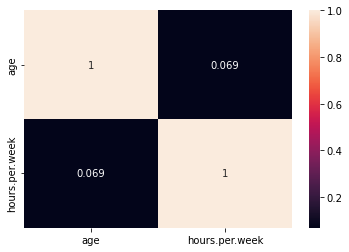

In [42]:
sns.heatmap(census_data2.corr(),annot=True)

**11) Individual with age less than 18 and capital loss less than 100**


In [44]:
census_data[(census_data['age']<18) & (census_data['capital.loss']<100)]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1680,17,NaN,304873,10th,6,Never-married,NaN,Own-child,White,Female,34095,0,32,United-States,<=50K
3987,17,Private,175024,11th,7,Never-married,Handlers-cleaners,Own-child,White,Male,2176,0,18,United-States,<=50K
4151,17,Private,191260,9th,5,Never-married,Other-service,Own-child,White,Male,1055,0,24,United-States,<=50K
4154,17,NaN,333100,10th,6,Never-married,NaN,Own-child,White,Male,1055,0,30,United-States,<=50K
4156,17,Private,103851,11th,7,Never-married,Adm-clerical,Own-child,White,Female,1055,0,20,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31869,17,NaN,256173,10th,6,Never-married,NaN,Own-child,White,Female,0,0,15,United-States,<=50K
31948,17,Private,214787,12th,8,Never-married,Adm-clerical,Own-child,White,Female,0,0,25,United-States,<=50K
32035,17,Private,24090,HS-grad,9,Never-married,Exec-managerial,Own-child,White,Female,0,0,35,United-States,<=50K
32310,17,Private,311907,11th,7,Never-married,Other-service,Own-child,White,Male,0,0,25,United-States,<=50K


**12)  displaying which occupation has the highest number of males?**

In [46]:
census_male=census_data[(census_data['sex']=='Male')]

In [47]:
census_male.groupby(['occupation','sex'])['sex'].count().sort_values(ascending=False)

occupation         sex 
Craft-repair       Male    3877
Exec-managerial    Male    2907
Prof-specialty     Male    2625
Sales              Male    2387
Transport-moving   Male    1507
Other-service      Male    1495
Machine-op-inspct  Male    1452
Adm-clerical       Male    1233
Handlers-cleaners  Male    1206
Farming-fishing    Male     929
Tech-support       Male     580
Protective-serv    Male     573
Armed-Forces       Male       9
Priv-house-serv    Male       8
Name: sex, dtype: int64

**13) Analyzing the trend of the capital gain amount for 
different educational qualifications and writeing our observations**

In [68]:
census_trend=census_data.groupby('education')['capital.gain'].mean().to_frame().reset_index().sort_values(by='capital.gain')
census_trend

,education,capital.gain
3,1st-4th,125.875000
4,5th-6th,176.021021
1,11th,215.097872
5,7th-8th,233.939628
2,12th,284.087760
6,9th,342.089494
0,10th,404.574491
11,HS-grad,576.800114
15,Some-college,598.824167
7,Assoc-acdm,640.399250


<AxesSubplot:xlabel='education', ylabel='capital.gain'>

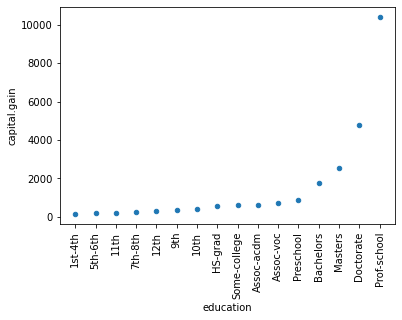

In [69]:
census_trend.plot(x='education',y='capital.gain',kind='scatter',rot=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

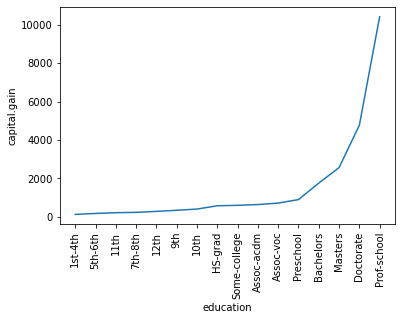

In [73]:
trend=sns.lineplot(data=census_trend,x='education',y='capital.gain')
plt.xticks(rotation=90)

**14) Comparing the working hours for each working class and writing our observations**

In [74]:
census_data.groupby('workclass')['hours.per.week'].mean().to_frame().sort_values(by='hours.per.week')

,hours.per.week
workclass,
Never-worked,28.428571
Without-pay,32.714286
State-gov,39.031587
Private,40.267096
Local-gov,40.982800
Federal-gov,41.379167
Self-emp-not-inc,44.421881
Self-emp-inc,48.818100


**15)Checking,All male profession occured in data or not,according to the data**

In [75]:
census_data.groupby(['occupation','sex'])['sex'].count() 

occupation         sex   
Adm-clerical       Female    2537
                   Male      1233
Armed-Forces       Male         9
Craft-repair       Female     222
                   Male      3877
Exec-managerial    Female    1159
                   Male      2907
Farming-fishing    Female      65
                   Male       929
Handlers-cleaners  Female     164
                   Male      1206
Machine-op-inspct  Female     550
                   Male      1452
Other-service      Female    1800
                   Male      1495
Priv-house-serv    Female     141
                   Male         8
Prof-specialty     Female    1515
                   Male      2625
Protective-serv    Female      76
                   Male       573
Sales              Female    1263
                   Male      2387
Tech-support       Female     348
                   Male       580
Transport-moving   Female      90
                   Male      1507
Name: sex, dtype: int64